# Enunciado

Crea una función que calcule el punto de encuentro de dos objetos en movimiento
en dos dimensiones

In [1]:
import matplotlib.pyplot as plt
import math
%matplotlib inline


Cada objeto está compuesto por una coordenada xy y una velocidad de desplazamiento

In [2]:
class Objeto:

  def __init__(self, x_coor, y_coor, velocity):
    """
    x_coor: coordenada x inicial
    y_coor: coordenada y inicial
    velocity: velocidad del objeto para 1 unidad de tiempo ([vx, vy])
    """
    self.x = x_coor
    self.y = y_coor
    self.v = velocity
    self.steps = [[self.x, self.y]]

  def mover(self, delta_t):
    for i in range(delta_t):
      self.steps.append([self.x + self.v[0] * i, self.y  + self.v[1] * i])

  def mostrar_trayectoria(self, title):

    _, ax = plt.subplots()
    ax.set(xlabel='x', ylabel='y', title=title)
    ax.grid()
    ax.plot([x[0] for x in self.steps], [x[1] for x in self.steps])

    if self.v[0] > 0:
      ax.plot([x[0] for x in self.steps], [x[1] for x in self.steps], '<r')
    else:
      ax.plot([x[0] for x in self.steps], [x[1] for x in self.steps], '>r')

    # Añadimos texto al punto de origen (🌟)
    delta_x = 0.1 * self.v[0]
    delta_y = 0.1 * self.v[1]
    x_pos = self.x + delta_x
    y_pos = self.y + delta_y
    ax.text(x_pos, y_pos, '٭', fontsize=25, color='green')
    # plt.show()

  def limpiar_pasos(self):
    self.steps = [[self.x, self.y]]

  def calcular_ecuacion(self):
    m = self.v[1] / self.v[0]
    b = self.y - m * self.x
    return m, b



Algunos ejemplos

(-1.0, 5.0)


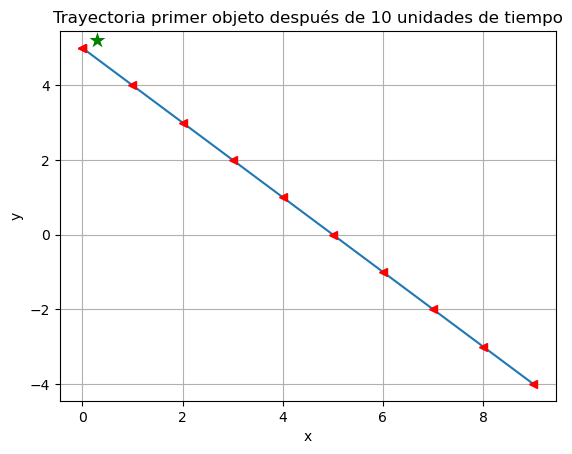

In [3]:
x1 = 0
y1 = 5
v1 = [1, -1]
obj = Objeto(x1, y1, v1)
obj.mover(10)

title="Trayectoria primer objeto después de 10 unidades de tiempo"
obj.mostrar_trayectoria(title=title)
print(obj.calcular_ecuacion());


(1.0, 0.0)


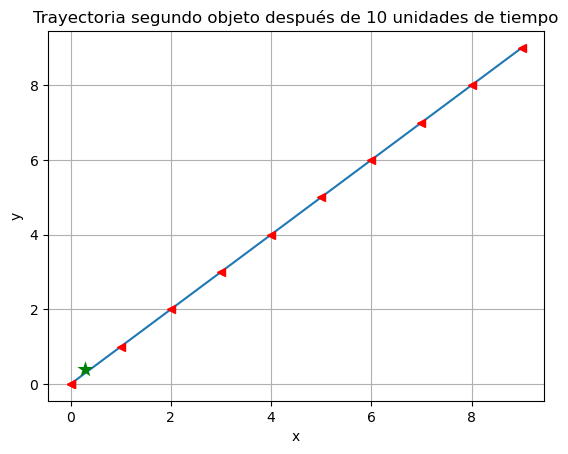

In [4]:
x2 = 0
y2 = 0
v2 = [1, 1]

obj2 = Objeto(x2, y2, v2)
obj2.mover(10)
title="Trayectoria segundo objeto después de 10 unidades de tiempo"
obj2.mostrar_trayectoria(title=title)
print(obj2.calcular_ecuacion());


En una sola gráfica

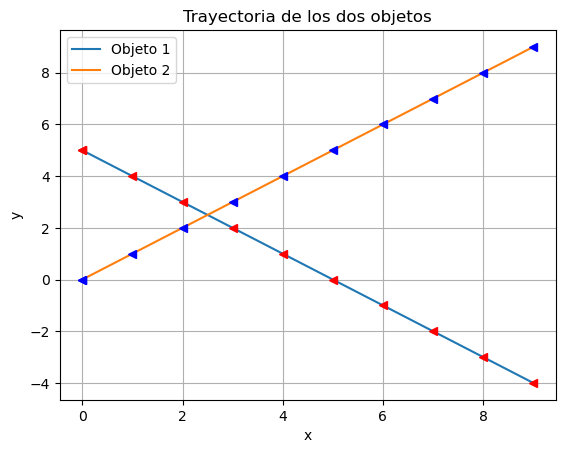

In [5]:
fig, ax = plt.subplots()
ax.set(xlabel='x', ylabel='y', title="Trayectoria de los dos objetos")
ax.grid()
ax.plot([x[0] for x in obj.steps], [x[1] for x in obj.steps], label="Objeto 1")
if obj.v[0] > 0:
  ax.plot([x[0] for x in obj.steps], [x[1] for x in obj.steps], '<r')
else:
  ax.plot([x[0] for x in obj.steps], [x[1] for x in obj.steps], '>r')
ax.plot([x[0] for x in obj2.steps], [x[1] for x in obj2.steps], label="Objeto 2")
if obj2.v[0] > 0:
  ax.plot([x[0] for x in obj2.steps], [x[1] for x in obj2.steps], '<b')
else:
  ax.plot([x[0] for x in obj2.steps], [x[1] for x in obj2.steps], '>b')
ax.legend()
plt.show()


Vamos con la función:

- La función recibirá las coordenadas de inicio de ambos objetos y sus velocidades.

In [6]:
def calcular_punto_encuentro(x1, y1, v1, x2, y2, v2):

  # Creamos los objetos
  obj1 = Objeto(x1, y1, v1)
  obj2 = Objeto(x2, y2, v2)

  # Obtenemos las ecuaciones de las rectas
  m1, b1 = obj1.calcular_ecuacion()
  m2, b2 = obj2.calcular_ecuacion()

  # print('m1:', m1, 'b1:', b1)
  # print('m2:', m2, 'b2:', b2)

  print(f'y1 = {m1} * x1 + {b1}')
  print(f'y2 = {m2} * x2 + {b2}')

  # Calculamos el punto de encuentro

  # Si las pendientes son iguales, o son la misma recta
  # (siempre se encuentran) o nunca se encuentran
  if m1 == m2:
    if b1 == b2:
      print("Las rectas son la misma!")
    else:
      print("Las rectas nunca se encuentran (son paralelas)")
    return

  # (Resolvemos el sistema de ecuaciones)
  x = (b2 - b1) / (m1 - m2)
  y = m1 * x + b1

  # Mostramos el resultado
  # print(f"Posible punto de encuentro en: ({x}, {y})")

  # Calculamos el tiempo de encuentro para cada objeto
  # para comprobar que hay una colisión
  t1 = (x - x1) / v1[0]
  t2 = (x - x2) / v2[0]

  # Función auxiliar para graficar los objetos
  def graficar_trayectoria():
    fig, ax = plt.subplots()
    ax.set(xlabel='x', ylabel='y', title=f'Colisión en ({x}, {y})')
    ax.grid()
    ax.plot([x[0] for x in obj1.steps], [x[1] for x in obj1.steps], label="Objeto 1")
    if obj1.v[0] > 0:
      ax.plot([x[0] for x in obj1.steps], [x[1] for x in obj1.steps], '<r')
    else:
      ax.plot([x[0] for x in obj1.steps], [x[1] for x in obj1.steps], '>r')
    ax.plot([x[0] for x in obj2.steps], [x[1] for x in obj2.steps], label="Objeto 2")
    if obj2.v[0] > 0:
      ax.plot([x[0] for x in obj2.steps], [x[1] for x in obj2.steps], '<b')
    else:
      ax.plot([x[0] for x in obj2.steps], [x[1] for x in obj2.steps], '>b')
    # Colocamos el punto de encuentro
    ax.plot(x, y, 'go', label="Punto de encuentro")
    ax.text(x, y, '¶', fontsize=25, color='green')
    ax.legend()
    plt.show()

  # Si los tiempos son iguales, hay colisión
  if t1 == t2:
    if t1:
      print(f"Tiempo de encuentro: {t1}")
    else:
      print("Hay colisión en el punto de origen")
    # Mostramos la trayectoria de los objetos
    obj1.mover(math.ceil(t1) + 1)
    obj2.mover(math.ceil(t2) + 1)
    graficar_trayectoria()

  else:
    # print(f't1: {t1}, t2: {t2}')
    print("No hay colisión")

  # print(f"El tiempo de encuentro es: {distancia}")

  return


## Ejemplo #1 (colisión)

y1 = -1.0 * x1 + 6.0
y2 = 1.0 * x2 + 0.0
Tiempo de encuentro: 3.0


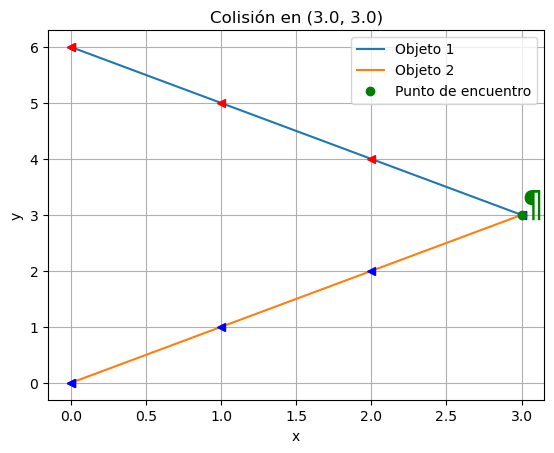

In [7]:
x1 = 0; y1 = 6; v1 = [1, -1]
x2 = 0; y2 = 0; v2 = [1, 1]
calcular_punto_encuentro(x1, y1, v1, x2, y2, v2)


## Ejemplo #2 (misma recta)

In [8]:
x3 = 0; y3 = 0; v3 = [1, 1]
x4 = 0; y4 = 0; v4 = [1, 1]

calcular_punto_encuentro(x3, y3, v3, x4, y4, v4)


y1 = 1.0 * x1 + 0.0
y2 = 1.0 * x2 + 0.0
Las rectas son la misma!


## Ejemplo #3 (colisión en el punto de partida)

y1 = 1.0 * x1 + 0.0
y2 = 2.0 * x2 + 0.0
Hay colisión en el punto de origen


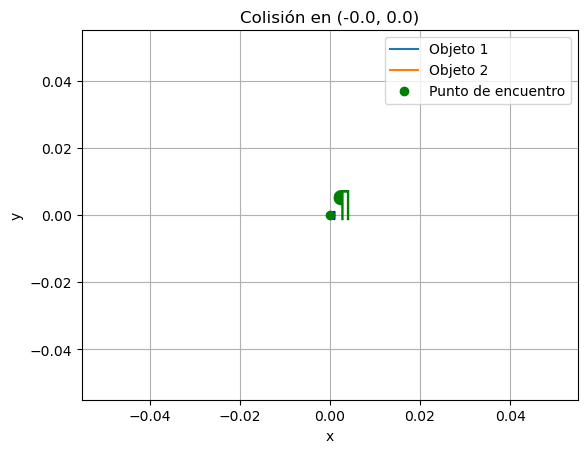

In [9]:
x5 = 0; y5 = 0; v5 = [1, 1]
x6 = 0; y6 = 0; v6 = [1, 2]

calcular_punto_encuentro(x5, y5, v5, x6, y6, v6)


## Ejemplo #4 (sin colisión)

In [10]:
x7 = 0; y7 = 0; v7 = [2, 1]
x8 = 0; y8 = 1; v8 = [1, -2]
calcular_punto_encuentro(x7, y7, v7, x8, y8, v8)


y1 = 0.5 * x1 + 0.0
y2 = -2.0 * x2 + 1.0
No hay colisión
